# St. Matthew island: Selection Theory and Population dynamics.

St. <a href="https://en.wikipedia.org/wiki/St._Matthew_Island"> Matthew Island </a> is a remote island in the Bering Sea in Alaska.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2c/St._Matthew_Island_World_Wind.jpg/800px-St._Matthew_Island_World_Wind.jpg" width="300">

In 1944, 29 reindeer were introduced to the island by the United States Coast Guard to provide an emergency food source. The Coast Guard abandoned the island a few years later, leaving the reindeer. Subsequently, the reindeer population rose abruptly to about 6,000 by 1963. Then died off in the next two years to 42 animals: 41 females and 1 infertile male. By the 1980s, the reindeer population had completely died out.

<tr>
<td>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6g8QfSVQMWWRt0rEEI9b8uNSzu-Hqp7Hu9GsEdIvEIXaE8VyT" width="300"> 
</td>
<td>
<img src="https://media-cdn.tripadvisor.com/media/photo-s/04/cb/2e/09/deers-with-branched-stag.jpg" width="300">
</td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/6/65/Dead_deer.jpg" width="300">
</td>
</tr>

The aim of this notebook consists on use <a href="https://en.wikipedia.org/wiki/R/K_selection_theory"> Selection Theory</a> and <a href="https://en.wikipedia.org/wiki/Population_dynamics"> Population ecology</a> to modelize St.Matthew island dynamics. For this purpose we will make use of <a href="https://en.wikipedia.org/wiki/Ordinary_differential_equation"> Ordinary Differential equations</a> (EDOs) which we will also briefly introduce.

In [543]:
import numpy as np                
from scipy.integrate import odeint                                                                                                     
import matplotlib.pyplot as plt

<h3> 1. An overview on EDOs </h3>

<i> (Mathematicians sorry me: the following is just to give an intuition of what EDOs are) </i>

<h4> 1.1 Ordinary functions </h4>

If a function is a mathematical object that maps a number to another number, i.e <b> the output is a number </b>.

$$ f(x) = x^{2} $$

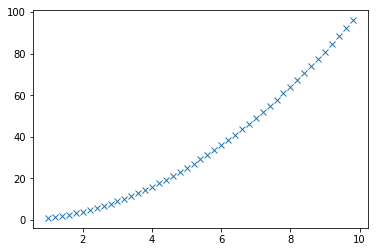

In [564]:
%matplotlib inline

def f(x: float) -> float: return x**2

x_values = [x for x in np.arange(1, 10, 0.2)]
f_square = [f(x) for x in x_values]

plt.plot(x_values, f_square, 'x')

<a id="section_1_1_2"></a>

<h4> 1.2 EDOs </h4>

A differential equation is a mathematical object that maps an input to a function, i.e <b> the output is a function </b>.

$$ \frac{dx}{dt} = A\cdot x$$


<i> (Following code of this section is copied from http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html) </i>

For our example let's work with <a href="https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations"> Lotka Volterra </a> first-order nonlinear differential equations. <b> Don't get scared </b>: my aim is just to give you an intuition of what EDOs are, rather than to understand the details, pass to the plots of this section directly if you wish.

$$ \frac{dx}{dt} = x\cdot (a−by)$$

$$ \frac{dy}{dt} = -y\cdot (c−ex)$$

In the same way that if we insert a single input to a function we get a single output, i.e 

$$f(2) = 4 $$ 

If we introduce a single parameter to an EDO we have a single function g(x) as output.

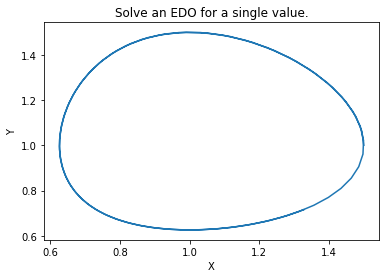

In [545]:
a,b,c,e = 1,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - e*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]

plt.plot(prey, predators, "-")
plt.title("Solve an EDO for a single value.")
plt.ylabel("Y")
plt.xlabel("X");

If we solve an EDO we have a infinite set of functions as outputs:

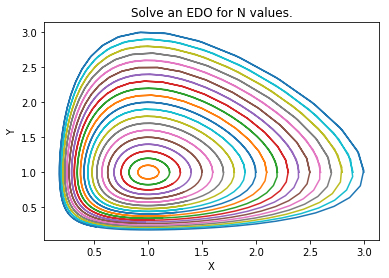

In [546]:
ic = np.linspace(1.0, 3.0, 21)
for r in ic:
    P0 = [r, 1.0]
    Ps = odeint(dP_dt, P0, ts)
    plt.plot(Ps[:,0], Ps[:,1], "-")
plt.title("Solve an EDO for N values.")
plt.ylabel("Y")
plt.xlabel("X");

<h3> 2. An overview on Population Dynamics </h3>

<h4> 2.1 About foxes and rabbits </h4>

<i> (Code of this section is copied from http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html) </i>

Foxes and rabbits are an usual study case for undergraduate students. Imagine a landscape with a given number of rabbits, rabbits eat grass and they reproduce very fast, fourtanetely for the ecosystem foxes eat rabbits and so they control their consume over grass. Then when foxes reproduce, they eat more rabbits, thus decimate rabbits population. When foxes cannot find enough rabbits to survive they start to pass away and so rabbits populations recovers to a new pick. These ecological dynamics is what is called Population Dynamics.

For this particular case the <a href="https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations"> Lotka Volterra</a> equations introduced before in order to help to modelize the problem and take an idea of how foxes and rabbits populations are correlated and balance each other in an equilibrited ecosystem. 

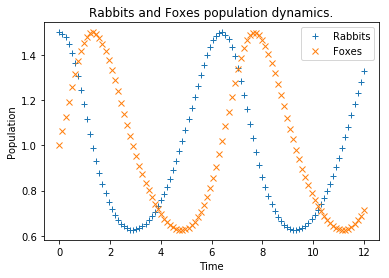

In [547]:
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.title("Rabbits and Foxes population dynamics.")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

<h4> 2.2 Introduce Foxes to a rabbits ecosystem </h4>

Now suppose we have an environment of rabbits and we introduce foxes. If we only track foxes population making an average over time what sort of dynamics would we see for foxes population?

<h4> 2.2.1 Foxes growth </h4>

If the population of foxes is P and their <a href="https://en.wikipedia.org/wiki/Birth_rate"> birth level</a> is r. The growth of their population could be described by the differential equation:

$$ \frac{dP}{dt} = r \cdot P $$

Let's plot this EDO to see how foxes population will growth. Suppose we have 29 foxes and their growth ratio is 5% i.e for every 20 members 1 borns for unit of time.

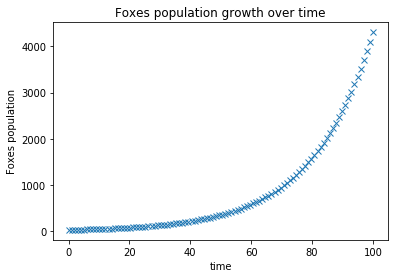

In [548]:
def f(p,time):
    """
    Foxes Growth EDO.
    """
    r = 0.05
    return r*p

time = np.linspace(0, 100, 100)

s0=29
s = odeint(f,s0,time)
 
plt.plot(time,s,'x', linewidth=2.0)
plt.xlabel("time")
plt.ylabel("Foxes population")
plt.title("Foxes population growth over time")
plt.show()

<a id="section_2_2_1"></a>

If we introduce a <a href="https://en.wikipedia.org/wiki/Mortality_rate">mortality rate</a>, $\color{blue}{k}$ which causes some of the member pass away and so reducing slightly the population then the population dynamics becomes:

$$ \frac{dP}{dt} = r \cdot P - \color{blue}{k \cdot P} = (r-\color{blue}{k}) \cdot P$$

Hence 

$$ \frac{dP}{dt} = r' \cdot P $$

Being $r'$ a corrected growth rate $r' = r-k$.

Consider a remmarkably lower than the birth rate (k = 1% for instance) we get the same exponential result, just damped:

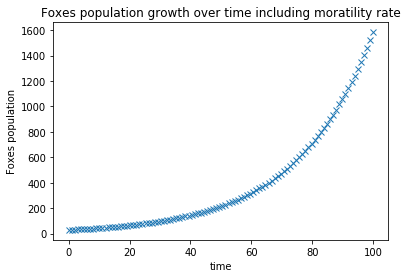

In [549]:
def f(p,time):
    """
    Foxes Growth EDO.
    """
    k = 0.01
    r = 0.05
    r_ = r-k
    return r_*p

time = np.linspace(0, 100, 100)

s0=29
s = odeint(f,s0,time)
 
plt.plot(time,s,'x', linewidth=2.0)
plt.xlabel("time")
plt.ylabel("Foxes population")
plt.title("Foxes population growth over time including moratility rate")
plt.show()

For the rest of this notebook we will neglect the mortality rate for simplicity.

<a id="section_2_2_2"></a>

<h4> 2.2.2 Foxes growth in a finite world </h4>

Nevertheless, as we seen <b> foxes population cannot growth for ever </b>, the unknown number of rabbits limits the number of foxes we will see in average. We then use M as the limit of foxes population limited by the unknown population of rabbits. Hence the growing of foxes will follow the <a href="https://www.maa.org/press/periodicals/loci/joma/an-introduction-to-population-ecology-harvesting-the-explosion-extinction-model"> Harvesting the Explosion-Extinction Model</a>.

$$ \frac{dP}{dt} = r \cdot P \cdot \color{blue}{(1-\frac{P}{M})}$$

Take a look to the equation, we limited the population by introducing the ratio 

$$ (1-\frac{P}{M})$$

When foxes population P reach its limit from the ecosystem M, i.e $P=M$ then 

$$ (1-\frac{P}{M}) = 0$$ 

which means that the foxes population growth is in average 0 when they reach the limit of the ecosystem.

$$ \frac{dP}{dt} =  r \cdot P \cdot \color{blue}{0} = 0 $$ 

Let's see how it looks like for 29 foxes that growth at a ratio of 5% and having a limit of 100 members of population (<b>in average</b>):

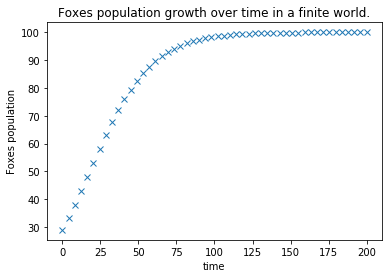

In [550]:
def f(p,time):
    """
    Foxes Growth in a finite world.
    
    :warning: M must be greater than s0
    """
    r = 0.05
    m = 100
    return r*p*(1-(p/m))

time = np.linspace(0, 200, 50)

s0=29
s = odeint(f,s0,time)

# to use further in the notebook
s_2_2_2 = s.copy()
 
plt.plot(time,s,'x', linewidth=2.0)
plt.xlabel("time")
plt.ylabel("Foxes population")
plt.title("Foxes population growth over time in a finite world.")
plt.show()

<a id="section_2_2_3"></a>

<h4> 2.2.3 Introducing the Food Chain: Human hunt foxes </h4>

What if foxes are not on the top of the food chain but humans? Humans hunt some foxes. How do we represent that? Let's introduce a ratio of human hunts $\color{blue}{h}$ that reduces the population in an amount P:

$$ \frac{dP}{dt} = rP \cdot (1-\frac{P}{M}) - \color{blue}{h P}$$

If we include mortality rate, $\color{red}{k}$, as in [section 2.2.1](#section_2_2_1) to the previous equation we have:

$$\frac{dP}{dt} = rP \cdot (1-\frac{P}{M}) - \color{blue}{hP} - \color{red}{k P}$$

Then

$$ \frac{dP}{dt} = rP \cdot (1-\frac{P}{M}) - (\color{blue}{h}+\color{red}{k}) P$$

Which can be considered as

$$ \frac{dP}{dt} = rP \cdot (1-\frac{P}{M}) - h' P$$

Being $ h' = h+k $. Thus we keep neglecting mortality rate as it is somehow included in the hunt index.

If humans hunt index is greater than foxes reproductive level then foxes will have problems.

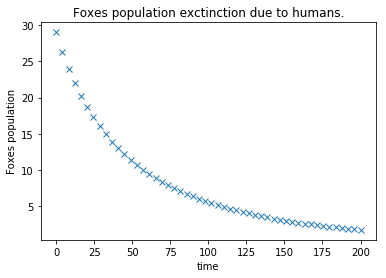

In [551]:
def f(p,time):
    """
    Foxes Growth in a finite world with humans hunting them to exctintion.
    
    :warning: M must be greater than s0
    """
    r = 0.05
    m = 100
    h = 0.06
    return r*p*(1-(p/m)) - h*p

time = np.linspace(0, 200, 50)

s0=29
s = odeint(f,s0,time)
s_2_2_3 = s.copy()
 
plt.plot(time,s,'x', linewidth=2.0)
plt.xlabel("time")
plt.ylabel("Foxes population")
plt.title("Foxes population exctinction due to humans.")
plt.show()

Foxes will get extinct (as humans are doing with thousand of species nowadays). Instead if the ratio is sustainable (h smaller than r) foxes will reach a lower but stable population.

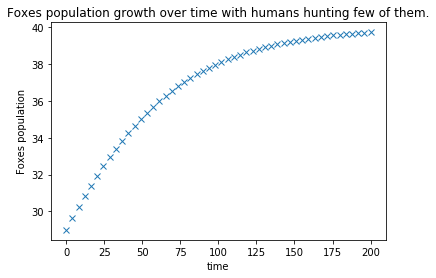

In [552]:
def f(p,time):
    """
    Foxes Growth in a finite world with humans hunting them.
    
    :warning: M must be greater than s0
    """
    r = 0.05
    m = 100
    h = 0.03
    return r*p*(1-(p/m)) - h*p

time = np.linspace(0, 200, 50)

s0=29
s = odeint(f,s0,time)
 
plt.plot(time,s,'x', linewidth=2.0)
plt.xlabel("time")
plt.ylabel("Foxes population")
plt.title("Foxes population growth over time with humans hunting few of them.")
plt.show()

<h3> 3. Selection Theory and St.Matthew island</h3>

None of the equations written so far describe what happened in St.Matthew island. The goal is to use all what we learned throughout this notebook to find a set of equations that modelize our problem accurately.

Selection theory states that there are two sort of species. The first are the k-type which growth slowly its population reaching armony with its ecosystem quite fast. Seconds are the r-type which growth exponentially perturbing the whole ecosystem before its population reduces abruptly when the natural resources have been consumed.

Our start point is the <a href="https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations"> Lotka Volterra</a> equation. Where F goes for food available and P for deers population. See [section 1.1.2](#section_1_1_2)

$$ \frac{dF}{dt} = F\cdot (a−bP)$$

$$ \frac{dP}{dt} = -P\cdot (c−eF)$$

The idea is to find equations that relate the food in St.Matthew island and deers population. Let's try to find a variation of Lotka Volterra formula that explains our system.

First of all let's modelize the behaviour of the grass, the food of the deers. Grass arrived to the island thousands of years before deers so suppose its population stable, being the island size the limit factor for its population. Let's use the Harvesting the Explosion-Extinction Model described in the section [section 2.2.2](#section_2_2_2)

$$ \frac{dF}{dt} = -r_{F} \cdot F \cdot(1-\frac{F}{M}) $$

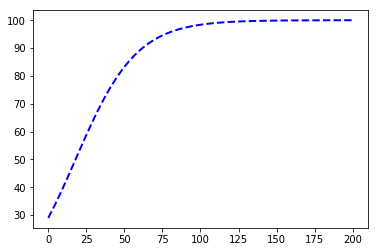

In [553]:
# grass population behaviour when it arrived to the island thousands of years ago
plt.plot(time,s_2_2_2,'b--', linewidth=2.0)

M is the limit factor imposed by the island size and $r_{F}$ the population growth once more soil is provided. Deers 'hunt' or just eat the grass it is equivalent to the example we went through [section 2.2.3](#section_2_2_3)

$$ \frac{dF}{dt} = -r_{F} \cdot F \cdot(1-\frac{F}{M}) - h \cdot P$$

Where $h \cdot P$ is the drop of population due to deers population.

In order to extinct the grass in twenty years deers must eat much more than grass can supply every year $h \gg r_{F}$.

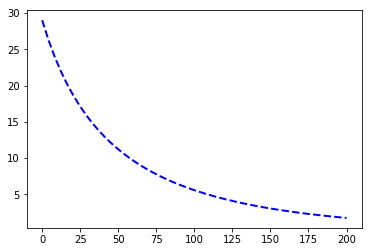

In [554]:
# grass exctiontion due to higher h than grass birth rate
plt.plot(time,s_2_2_3,'b--', linewidth=2.0)

On the other hand the deers population grow more as more deers are available (the more deers the more the couples).

$$ \frac{dP}{dt} = r_{P} \cdot P $$

However we have to add a parameter that in case of lack of food diminish deer's population accordingly. Suppose a ratio  between the populations of deer and grass,i.e $\color{blue}{\frac{P}{F}}$, so that if there is much more grass than deers it is small and skyrocket as the grass dissapears.

$$ \frac{dP}{dt} = r_{P} \cdot (P - \color{blue}{\frac{P}{F}}) $$

Hence our system equations are

$$ \frac{dF}{dt} = -r_{F} \cdot F \cdot(1-\frac{F}{M}) - h \cdot P$$

$$ \frac{dP}{dt} = r_{P} \cdot (P - \frac{P}{F}) $$

Where deers birth rate must be much higher than grass $r_{P} \gg r_{F}$. 

Tuning parameters to make the results look close to the real values I found that 

$$ r_{F} = 0.5 $$

$$ h = 10 $$

$$ r_{P} = 50 $$

$$ M = 1000 $$

works quite well and fits the story of St.Matthew island

Initial number of deers: 29
Maximum number of deers: 6736
Last number of deers: 0


/home/capitan/anaconda3/envs/games/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


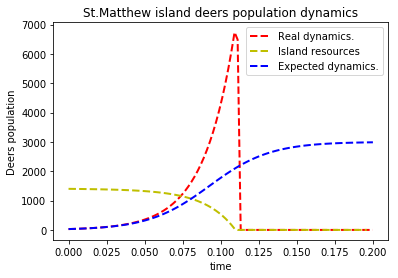

In [556]:
"""
Real population dynamics
"""

def dP_dt(P, t):
    r = .5
    h = 10
    k = 50
    m = 1000
    return [r*P[0]*(1-(P[0]/m))-h*P[1], k*(P[1]-P[1]/P[0])]

time = np.linspace(0, .2, 100)
P0 = [1400, 29]
Ps = odeint(dP_dt, P0, time)
predators = Ps[:,1]
presa = Ps[:,0]

print('Initial number of deers: {}'.format(int(predators[0])))
print('Maximum number of deers: {}'.format(int(max(predators))))
print('Last number of deers: {}'.format(int(predators[-1])))


"""
Expected population dynamics by scientist
"""
def f(p,time):
    """
    Foxes Growth in a finite world.
    
    :warning: M must be greater than s0
    """
    x = 50
    m = 3000
    return x*p*(1-(p/m))

s0=29
s = odeint(f,s0,time)
    
"""
Plot everything
"""
plt.plot(time,predators,'r--', linewidth=2.0, label="Real dynamics.")
plt.plot(time,presa,'y--', linewidth=2.0, label="Island resources")
plt.plot(time,s,'b--', linewidth=2.0, label="Expected dynamics.")
plt.xlabel("time")
plt.ylabel("Deers population")
plt.legend()
plt.title("St.Matthew island deers population dynamics")
plt.show()

<h3> CONCLUSIONS </h3>

In this notebook we have seen how to use EDOs to modelize dynamics problems and we have used scipy module to integrate EDOs with Python. We have learn about population dynamics and applied to a real case studio.

Even though the equation we built based on intuition:

$$ \frac{dP}{dt} = r_{P} \cdot (P - \frac{P}{F}) $$

fits well what we wanted to see in order to explain St.Matthew deers exctintion there could be others equations which explains more accurately this scenario.

A better tunning of variables could also fit the date range of the problem which have been ignored and is out of the scope of the current notebook. Further work could go in the direction of explain a whole ecosystem food chain and how a peturbation disturb the whole system. Also introduce entropy and study paralelisms between thermodynamics out of equilibrium and ecosystem dynamics would be an interesting exercise.

<h3> Extra bibliography </h3>

Other reads:

http://www.maths.usyd.edu.au/MATH3063/r/Chapter5.pdf